# 6.0002 Lecture 7: Confidence Intervals

**Speaker:** Prof. John Guttag

## Assumptions underlying Empirical Rule
- the mean estimation error is 0
- the distribution of the errors in the estimates is normal (Gaussian)

## Generating normally distributed data

Fraction within ~200 of mean = 0.9566809999999959


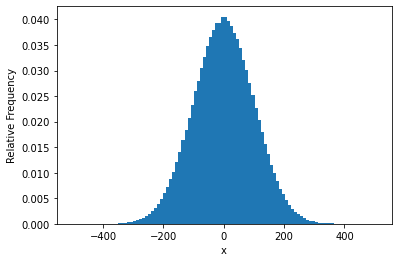

In [1]:
import random
import pylab

dist, numSamples = [], 1000000

# draw normally distributed data
for i in range(numSamples):
    dist.append(random.gauss(0, 100)) # mean = 0, SD = 100
    
# weight each element in the bins by the same amount
weights = [1/numSamples]*len(dist)

# plot histogram
v = pylab.hist(dist, bins=100, weights=weights) # tuple of len 2
pylab.xlabel('x')
pylab.ylabel('Relative Frequency')

print('Fraction within ~200 of mean =', sum(v[0][30:70])) # i.e. within 2 SD's of mean

- the above plot is a discrete approximation to the PDF for $\mathcal{N}(0,10^4)$
    - $\mu = 0$
    - $\sigma = 100$
- the weights gave us relative frequencies, which is why we see fractions on the y-axis and NOT counts

## Probability density functions (recapping)
- distributions defined by *probability density functions* (PDFs)
- probability of a random variable lying between two values
- defines a curve where the values on the x-axis lie between minium and maximum value of the variable
- area under curve between two points, is probability of example falling within that range

## PDF for Normal Distribution
$$f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In [2]:
# function for gaussian pdf
def gaussian(x, mu, sigma):
    factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2

Text(0.5, 1.0, 'Normal Distribution, mu = 0, sigma = 1')

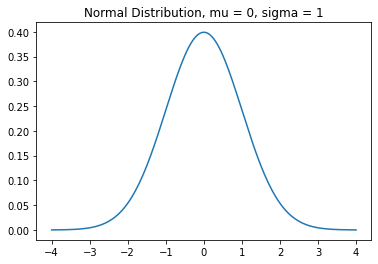

In [3]:
xVals, yVals = [], []
mu, sigma = 0, 1
x = -4

while x <= 4:
    xVals.append(x)
    yVals.append(gaussian(x, mu, sigma))
    x += 0.05

pylab.plot(xVals, yVals)
pylab.title('Normal Distribution, mu = ' + str(mu)\
            + ', sigma = ' + str(sigma))

## Output
- are values on y-axis probabilities?
- They are **densities**
    - i.e. derivative of cumulative distribution function:
    $$f(x) = \frac{\textrm{d}\mathbb{P}(x)}{\textrm{d} x}$$
- Hence, we use integration to interpret a PDF
$$\mathbb{P}(X\leq a) = \int_{-\infty}^a f(x) \textrm{d}x$$

## A digression
- **SciPy** library contains many useful mathematical functions used by scientists and engineers
- scipy.integrate.quad has up to four arguments
    - a function or method to be integrated
    - a number representing the lower limit of integration
    - a number representing the upper limit of integration
    - an optional tuple supplying values for all arguments, except the first, of the function to be integrated
- scipy.integrate.quad returns a tuple:
    - approximation of result
    - estimate of absolute error

## Checking the Empirical Rule

In [4]:
import scipy.integrate

def checkEmpirical(numTrials):
    for t in range(numTrials):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
        print('For mu =', mu, 'and sigma =', sigma)
        for numStd in (1, 1.96, 3):
            area = scipy.integrate.quad(gaussian, 
                                        mu-numStd*sigma, 
                                        mu+numStd*sigma,
                                        (mu, sigma))[0]
            print(' Fraction within', numStd, 'std =', round(area, 4))

## Results

In [5]:
checkEmpirical(3)

For mu = -5 and sigma = 10
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = -6 and sigma = 3
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = 2 and sigma = 7
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973


## Everybody likes Normal Distributions
- they occur a lot!
- nice mathematical properties

## But not all distributions are normal
- empirical rule works for normal distributions
- but are the outcomes of the spins of a roulette wheel normally distributed?
- no, they are uniformly distributed
    - each outcome is equally probable
- so, why does the empirical rule work here?

## Why did the empirical rule work?
- because we are reasoning not about a single spin, but about the **mean of a set** of spins
- and the **Central Limit Theorem (CLT)** applies

## The Central Limit Theorem (CLT)
- reminder:
    - a **population** is a set of examples
    - a **sample** is a subset of the population
- given a sufficiently large sample:
    - 1.) The means of the samples in a set of samples (the sample means) will be approximately normally distributed,
    - 2.) This distribution will have a mean close to the mean of the population, and
    - 3.) The variance of the sample means will be close to the variance of the population divided by the sample size.

## Checking CLT for a continuous die

In [6]:
# helper function to get mean and std of data
def getMeanAndStd(X):
    """Assumes X is a list of numbers
        Returns the mean and standard 
        deviation of X"""
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

In [7]:
def plotMeans(numDice, numRolls, numBins, legend, color, style):
    means = []
    for i in range(numRolls // numDice): # numTrials
        vals = 0
        for j in range(numDice):
            vals += 5*random.random()
        means.append(vals/float(numDice))
    pylab.hist(means, numBins, color=color, label=legend, 
              weights=pylab.array(len(means)*[1])/len(means), 
              hatch=style)
    return getMeanAndStd(means)

Mean of rolling 1 die = 2.502601021261434,  Std = 1.4432298744570917
Mean of rolling 50 dice = 2.4999878824192225,  Std =  0.2031549694258352


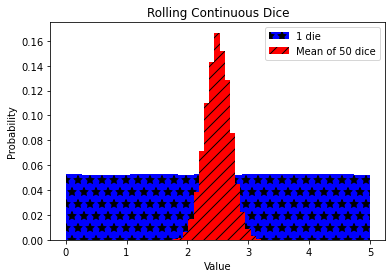

In [8]:
mean, std = plotMeans(1, 1000000, 19, '1 die', 'b', '*')
print('Mean of rolling 1 die =', str(mean) + ', ', 'Std =', std)
mean, std = plotMeans(50, 1000000, 19, 'Mean of 50 dice', 'r', '//')
print('Mean of rolling 50 dice =', str(mean) + ', ', 'Std = ', std)
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()

## Try if for roulette

In [9]:
# FairRoulette game
class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1, 37):
            self.pockets.append(i)
        self.ball = None
        self.pocketOdds = len(self.pockets) - 1
    def spin(self):
        self.ball = random.choice(self.pockets)
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else:
            return -amt
    def __str__(self):
        return 'Fair Roulette'
    
    

# play the game
def playRoulette(game, numSpins, pocket, bet, toPrint=False):
    totPocket = 0
    for i in range(numSpins):
        game.spin()
        totPocket += game.betPocket(pocket, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting', pocket, '=',\
              str(100*totPocket/numSpins) + '%\n')
    return (totPocket/numSpins)

# find return on a pocket bet
def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, 2, 1, toPrint)
        pocketReturns.append(trialVals)
    return pocketReturns

Text(0.5, 1.0, 'Expected Return Betting a Pocket 200  Times')

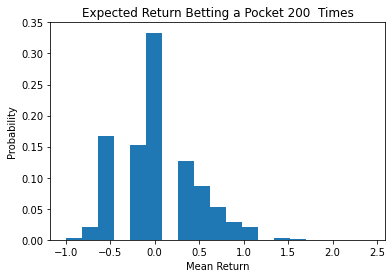

In [10]:
numTrials = 10**6
numSpins = 200
game = FairRoulette()

means = []
for i in range(numTrials):
    means.append(findPocketReturn(game, 1, numSpins, False)[0])
    
pylab.hist(means, bins=19, weights=[1/len(means)]*len(means))
pylab.xlabel('Mean Return')
pylab.ylabel('Probability')
pylab.title('Expected Return Betting a Pocket 200  Times')

## Moral
- it doesn't matter what the shape of the distribution of values happens to be
- if we are trying to estimate the mean of a population using sufficiently large samples
- the CLT allows us to use the empirical rule when computing confidence intervals

## Pi ($\pi$)
$$\frac{\textrm{circumference}}{\textrm{diameter}} = \pi$$
$$\textrm{area}=\pi \cdot \textrm{radius}^2$$
- earliest estimate of $\pi$ was by the Egyptians on the Rhind Papyrus
    - estimated it to be $4\cdot(\frac{8}{9})^2 = 3.16$

## ~100 years later
- In the Bible:
    - "And he made a molten sea, ten cubits from the one brim to the other: it was round all about, and his height was five cubits: and a line of thirty cubits did compass it round about." -- 1 Kings 7.23
- this would imply that the estimate of $pi$ is about $3$
- "And I'm sure that's what Mike Pence thinks it is." -- Prof. Guttag

## ~ 300 years later (Archimedes)
- computed circumferences of polygons approximating a circle
    - found $\frac{223}{71} < \pi < \frac{22}{7}$

## ~ 2000 years later (Buffon-Laplace)
- proposed a Monte Carlo simulation
- take a circle of radius 1 and inscribe it in a square of side length 2. 
    - Area of square: $A_s = 2\cdot 2 = 4$
    - Area of circle: $A_c = \pi r^2 = \pi$
- drop needles onto the square (falling at random):
    - $\frac{\textrm{needles in circle}}{\textrm{needles in square}} = \frac{A_c}{A_s}$
    - $A_c = \frac{A_s \cdot \textrm{needles in square}}{\textrm{needles in square}}$
    - $\implies A_c = \frac{4\cdot \textrm{needles in circle}}{\textrm{needles in square}}$

## Simulating Buffon-Laplace method

In [11]:
def throwNeedles(numNeedles):
    inCircle = 0
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y)**0.5 <= 1.0:
            inCircle += 1
    return 4*(inCircle/float(numNeedles))

In [15]:
def getEst(numNeedles, numTrials):
    estimates = []
    for t in range(numTrials):
        piGuess = throwNeedles(numNeedles)
        estimates.append(piGuess)
    sDev = getMeanAndStd(estimates)[1]
    curEst = sum(estimates)/len(estimates)
    print('Est. = ' + str(curEst) +\
          ', Std. dev. = ' + str(round(sDev, 6))\
          + ', Needles = ' + str(numNeedles))
    return (curEst, sDev)

In [16]:
def estPi(precision, numTrials):
    numNeedles = 1000
    sDev = precision
    while sDev >= precision/2:
        curEst, sDev = getEst(numNeedles, numTrials)
        numNeedles *= 2
    return curEst

In [17]:
estPi(0.005, 100)

Est. = 3.1391600000000013, Std. dev. = 0.051273, Needles = 1000
Est. = 3.1401, Std. dev. = 0.035144, Needles = 2000
Est. = 3.1393, Std. dev. = 0.024503, Needles = 4000
Est. = 3.1405349999999985, Std. dev. = 0.01824, Needles = 8000
Est. = 3.1419949999999996, Std. dev. = 0.012645, Needles = 16000
Est. = 3.1414050000000007, Std. dev. = 0.009604, Needles = 32000
Est. = 3.140543124999999, Std. dev. = 0.006473, Needles = 64000
Est. = 3.1418149999999994, Std. dev. = 0.004355, Needles = 128000
Est. = 3.1415145312500012, Std. dev. = 0.002901, Needles = 256000
Est. = 3.1413355468750006, Std. dev. = 0.002412, Needles = 512000


3.1413355468750006

## Being right is not good enough
- not sufficient to produce a good answer
- need to have reason to believe that it is close to right
- in this case, small standard deviation implies that we are close to the true value of $\pi$
- ...right?

## Is it correct to state
- 95% of the time we run this simulation, we will estimate that the value of $\pi$ is between 3.13743875875 and 3.14567467875?
    - Yes!
- with a probability of 0.95 the actual value of $\pi$ is between 3.13743875875 and 3.14567467875?
    - Yes!
- both are factually correct
- but only one of these statements can be inferred from our simulation
- statisticall valid $\neq$ true

## Introduce a bug

In [18]:
def throwNeedles(numNeedles):
    inCircle = 0
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y)**0.5 <= 1.0:
            inCircle += 1
    return 2*(inCircle/float(numNeedles)) # replaced 4 with 2 (incorrect)

In [19]:
# run the simulation with error 
estPi(0.005, 100)

Est. = 1.57272, Std. dev. = 0.02824, Needles = 1000
Est. = 1.57143, Std. dev. = 0.015937, Needles = 2000
Est. = 1.5706500000000005, Std. dev. = 0.012498, Needles = 4000
Est. = 1.571525, Std. dev. = 0.009119, Needles = 8000
Est. = 1.5714449999999998, Std. dev. = 0.005901, Needles = 16000
Est. = 1.5703568749999999, Std. dev. = 0.004404, Needles = 32000
Est. = 1.5707056249999996, Std. dev. = 0.003115, Needles = 64000
Est. = 1.5709484375000002, Std. dev. = 0.002531, Needles = 128000
Est. = 1.5707537499999997, Std. dev. = 0.001681, Needles = 256000


1.5707537499999997

- so we still get good confidence intervals, but bogus values of $\pi$
- statistics can tell us how reproducible our simulation is, but NOT whether the simulation is an actually valid model of reality
    - in this case, we would have to do a sanity check

## Generally useful technique
- to estimate the area of some region, $R$:
    - pick an enclosing region, $E$, such that the area of $E$ is easy to calculate and $R$ ies completely within $E$
    - pick a set of random points that lie within $E$
    - let $F$ be the fraction of the points that fall within $R$
    - multiply the area of $E$ by $F$
- way to estimate integrals